In [164]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from PIL import Image

DATASET_BASE_DIRECTORY = "../dataset2/"
DATASET_IMAGE_DIRECTORY = "../dataset2/images/"
DATASET_LABEL_DIRECTORY = "../dataset2/labels/"

In [191]:
# ================================================================================
# get_file_size -> Retornar o tamanho do arquivo.
# ================================================================================

def get_file_size(file_name : str):
    with open(os.path.join(DATASET_IMAGE_DIRECTORY, file_name), 'rb') as fid:
        encoded = fid.read()
    encoded_io = io.BytesIO(encoded)
    image = Image.open(encoded_io)
    return image.size

# ================================================================================
# get_line_info -> Transformar uma linha do arquivo texto para o objeto padrão.
# ================================================================================

def get_line_info(file_name : str, line : str) -> dict:
    # Saída ->
    # filename
    # width
    # height
    # class
    # xmin
    # ymin
    # xmax
    # ymax    
    if line is None:
        return None
    
    columns = line.split(' ')
    
    if len(columns) != 5:
        return None
    
    width_file, height_file = get_file_size(file_name)
    
    x = float(columns[1])
    y = float(columns[2])
    width = float(columns[3])
    height = float(columns[4])
    xmin, ymin = int((x * width_file) - ((width * width_file)/2)), int((y * height_file) - ((height * height_file))/2)
    xmax, ymax = int((x * width_file) + ((width * width_file)/2)), int((y * height_file) + ((height * height_file))/2)
    
    return { 
             "filename" : file_name,
             "class" : int(columns[0]) + 1,
             "x" : x,
             "y" : y,
             "width" : width,
             "height" : height,
             "width_file" : width_file,
             "height_file" : height_file,        
             "xmin" : xmin,
             "ymin" : ymin,
             "xmax" : xmax,
             "ymax" : ymax,
             "className" : ["car", "truck", "bus", "minibus", "cyclist"][int(columns[0])]
           }

# ================================================================================
# load_label_file -> Carregar o arquivo que contém as marcações
# ================================================================================

def load_label_file(label_directory : str, label_file_name : str, image_file_name : str):
    image_files = []
    full_file_path = os.path.join(label_directory, label_file_name)    
    with open(full_file_path, 'r') as file:        
        for line in file:
            info = get_line_info(image_file_name, line)
            if not info is None:
                image_files.append(info)
    return image_files


# ================================================================================
# get_markup_data -> Carregar as marcações dos arquivos
# ================================================================================

def get_markup_data():
    images = [_ for _ in os.listdir(DATASET_IMAGE_DIRECTORY)]
    labels = [_ for _ in os.listdir(DATASET_LABEL_DIRECTORY)]
    file_marks = []

    for file in labels:

        file_parts = file.split('.')

        if file_parts is None or len(file_parts) == 0:
            continue

        file_name = file_parts[0]
        file_extension = file_parts[-1]
        find_file_images = list(filter(lambda x: x == "{0}.png".format(file_name) or x == "{0}.jpg".format(file_name), images))

        if find_file_images is None or len(find_file_images) == 0:
            break;

        label_file_data = load_label_file(
            DATASET_LABEL_DIRECTORY, 
            file, 
            find_file_images[0])

        if label_file_data is None or len(label_file_data) == 0:
            continue

        for _ in label_file_data:
            file_marks.append(_)

    return file_marks

def get_render(df : pd.DataFrame, file_name : str):
    img = cv2.imread(os.path.join(DATASET_IMAGE_DIRECTORY, file_name), 0)
    height, width = img.shape
    df_render = df[df.filename == file_name]
    for index, row in df_render.iterrows():
        cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0,255,0),3)
    del df_render
    plt.imshow(img)
    plt.title('Imagem (%s)' % file_name)
    cv2.imwrite('d:/temp/%s' % file_name, img)
    plt.show()
    cv2.destroyAllWindows()

In [192]:
# Carregar os arquivos de marcação
data = get_markup_data()
df = pd.DataFrame(data)
df.to_csv(os.path.join(DATASET_BASE_DIRECTORY, 'dataset.csv'), header=True, index=False)

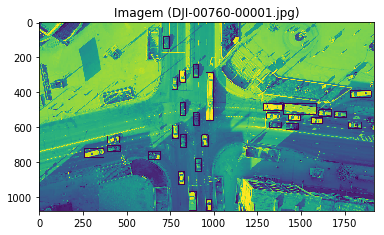

In [193]:
for file_name in df.filename:
    get_render(df, file_name)
    break

In [156]:
with open(os.path.join(DATASET_IMAGE_DIRECTORY, df.filename[0]), 'rb') as fid:
    encoded = fid.read()
encoded_io = io.BytesIO(encoded)
image = Image.open(encoded_io)
width, height = image.size

In [157]:
print(width, height)

1920 1080


In [208]:
filename = str(df.filename[0]).encode('utf8')
if b".ejpg" in filename:
    print("ok")
else:
    print("no")

no
